# **Problem set 4** - Machine Learning for Physics and Astronomy 2023/2024, UvA

- The total sheet gives 27 points
- Deadline for submitting your results is **Wed, 8/5/2024, 23:59**
- **IMPORTANT**: Specify if/how AI was used to solve the exercises by filling the corresponding "Usage of AI" comments. Anything between "No" (if applicable) and a short paragraph reflecting how AI was used is fine. Failing to do so faithfully will result in the substraction of points.

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

## Chapter 7: Basic Deep learning - The Multi Layer Perceptron （14 points）

### 7.1 Pytorch Basics (4 points)

In this exercise, we will be exploring some basic aspects of `pytorch`, its `autograd` functionality, and connecting the neural network theory to code.

Consider the folloiwng simple linear model. This is equivalent to the Logistic Regression model from last week, with 5 inputs and 1 output. We now take a look at a print out of its internal parameters. Now is a good time to (re-)familiarize yourself with the [PyTorch documentation](https://pytorch.org/docs/stable/index.html). Before asking questions, make sure you seek solutions by searching the official documentation link provided above (or try using other tools like large language models and popular search engines).

In [2]:
# define a machine learning "model", here a simple linear layer
model = torch.nn.Linear(5, 1)

# iterate over all parameters in the model
for par in model.parameters():
    # print parameter (pytorch can print out the parameters nicely for us)
    print(par)

    # print shape and gradient
    print('shape:', par.shape, 'gradient:', par.grad)
    print('----')

Parameter containing:
tensor([[ 0.3829,  0.4435, -0.3928, -0.1051,  0.1257]], requires_grad=True)
shape: torch.Size([1, 5]) gradient: None
----
Parameter containing:
tensor([0.0381], requires_grad=True)
shape: torch.Size([1]) gradient: None
----


1. (1 point) What is the mathematical definition of this model?


*   $y = xA^{T} + b$


It's a linear transformation.

How do the printed parameters of the model relate to the mathematical defintion, i.e. what does each parameter represent?


*   The first parameters is 1X5 matrix given by the first input of `nn.linear()`
*   The second parameter is a vector of length 1 which is the second input of `nn.linear()`


  What is `par.grad` showing, and why is it `None`?
  

*   `par.grad` computes the gradient of the tensor or parameter for each parameter
* Since we're evaluating a scalar it should be None




 Why does it make sense that `requires_grad` is initialized to `True`?



*   You most likely want to analyze the graident of a function for gradient descent metods






Now let us provide an input tensor $x$ for our model and compute the gradients with respect to our parameters. This is done via the `.backward()` call.

In [3]:
x = torch.tensor([1., 2., 3., 4., 5.])
model = torch.nn.Linear(5, 1)
y = model(x)
y.backward()
for par in model.parameters():
    print(par, par.shape, par.grad)

Parameter containing:
tensor([[ 0.2811, -0.3860, -0.4328,  0.3106,  0.0249]], requires_grad=True) torch.Size([1, 5]) tensor([[1., 2., 3., 4., 5.]])
Parameter containing:
tensor([-0.0448], requires_grad=True) torch.Size([1]) tensor([1.])


2. (1 point) Analytically, what are the gradients that the above code calculates? This should stem from your model definition. Note that `par.grad` is no longer None. What information does `par.grad` contain?


*  The gradients differeniate the tensor with chain rule
[Documentation Source](https://pytorch.org/docs/stable/generated/torch.autograd.backward.html#torch.autograd.backward)


*   `par.grad` contains the gradient at each vector point










YOUR SOLUTION

3. (1 point) Let's now switch to an ever so slightly more complex model: a multi-layer perceptron (MLP) with two hidden layers (with 10 and 4 hidden neurons). What is the mathemtatical defintion of the following model, which is defined using `nn.Sequential`?  Inspect its internal parameters. How are the internal parameters of the model related to the mathematical defintion you wrote down?

In [4]:
model = torch.nn.Sequential(
    torch.nn.Linear(2, 10), torch.nn.ReLU(),
    torch.nn.Linear(10, 4), torch.nn.ReLU(),
    torch.nn.Linear(4, 1), torch.nn.Sigmoid(),
)

In [5]:
# YOUR CODE HERE
for par in model.parameters():
  print(par, par.shape, par.grad)

Parameter containing:
tensor([[-0.4546, -0.0276],
        [ 0.1454,  0.2087],
        [ 0.4885,  0.5270],
        [-0.2780,  0.6436],
        [ 0.2151,  0.1405],
        [-0.5550, -0.2210],
        [-0.1408,  0.1882],
        [-0.5695,  0.0146],
        [-0.3214,  0.4774],
        [-0.4334,  0.6463]], requires_grad=True) torch.Size([10, 2]) None
Parameter containing:
tensor([ 0.2363,  0.1339,  0.2379, -0.1816, -0.0252,  0.0209,  0.0176,  0.4859,
         0.3008, -0.2891], requires_grad=True) torch.Size([10]) None
Parameter containing:
tensor([[ 0.0738, -0.0672, -0.2557, -0.1583, -0.3028, -0.2497,  0.1819,  0.0460,
          0.0991,  0.2644],
        [ 0.1464, -0.0497,  0.2168,  0.2106, -0.0982,  0.0217,  0.2499, -0.1182,
         -0.0641,  0.0139],
        [ 0.0829,  0.2983, -0.2287,  0.2861, -0.2979, -0.2977, -0.1995,  0.1397,
         -0.1873,  0.0205],
        [-0.1121, -0.0849,  0.0842, -0.2990,  0.2990, -0.0555, -0.0903,  0.1339,
         -0.0483,  0.0916]], requires_grad=True) to

YOUR ANSWER HERE

*  Sequetnial creates a model framework
* In our case we have 3 linear model layers to create a neural network each with their own activation function
* Vectors are passed into the model, we apply linear tensor operations
* The resulting vector is computed through the acivation function ReLU or sigmiod




4. (0.5 point) Run different random tensors generated with `torch.randn(...)` through the previous model. Start with tensors of the shape (2,), (1,2),(9, 2), (2, 4, 2). How are input shapes connected to output shapes? What is the role of the last dimension and what constraints do we have there?

*Hint: Consider the case of training a neural network, i.e. passing the neural network many individual examples. In that case, what do the first dimension(s) represent?*

In [6]:
# YOUR SOLUTION

random_tensors = [torch.randn(2,),torch.randn(1,2), torch.randn(9,2),torch.randn(2,4,2)]
for tensors in random_tensors:
  y = model(tensors)
  print(f"Input shape:",{tensors.shape}, 'Output shape:', {y.shape})

Input shape: {torch.Size([2])} Output shape: {torch.Size([1])}
Input shape: {torch.Size([1, 2])} Output shape: {torch.Size([1, 1])}
Input shape: {torch.Size([9, 2])} Output shape: {torch.Size([9, 1])}
Input shape: {torch.Size([2, 4, 2])} Output shape: {torch.Size([2, 4, 1])}


The first dimension of the input tensor is the first dimension of the output tensor <br>
The last dimension of the input tensor must match the first dimension of the first hidden layer (torch.nn.Linear(2, 10)) in our case dim=2. Since we are doing matrix multiplication.
<br>
The last dimension will always be a tensor with the same length of the last network layer in our case for torch.nn.Linear(4, 1), the last dimension will always be dim=1.

5. (0.5 points) Give one additional shape that would lead to an error when tried and explain why!



In [7]:
# failure_tensor = torch.randn(3,10)
# y_fail = model(failure_tensor)


You can see this below for a [3,10] dimesnion tensor but any input that isn't 2 dim

**Usage** of AI: *None*

---



### 7.2 Classification! From logistic regression to classification with MLPs (5 points)


This exercise will show you how to solve more complicated classification tasks using MLPs with PyTorch. We will here use our own toy simulator to generate training data sets.  The simulator that is implemented below produces points in the 2-dim hypercube and classifies them as y = 0, 1 in a ring-segment pattern.  There are two parameters that you can play with to change that pattern.

Below is an example code that targets this classification problem with a neural network using one (output) node with a sigmoid activation function, similar to what was used for the logistic regression in exercise sheets 3 and 4. Try to run and understand the code.

In [8]:
torch.manual_seed(0)

I wrote comments for my understanding

In [9]:
def simulator(nsamples, contrast = 7, scale = 7):
    X = torch.rand(nsamples, 2) # create a matrix of size [sample by 2]
    R = torch.sqrt(X[:,0]**2 + X[:,1]**2) #find the length of the matrix
    p = torch.sigmoid(torch.cos(R*scale)*contrast) #pass the vector as a cosine into a sigmoid
    #bernouli distribution
    y = torch.bernoulli(p) #draw a 1 or zero each time as a trail
    return X, y

X, y = simulator(3000)  # Data set

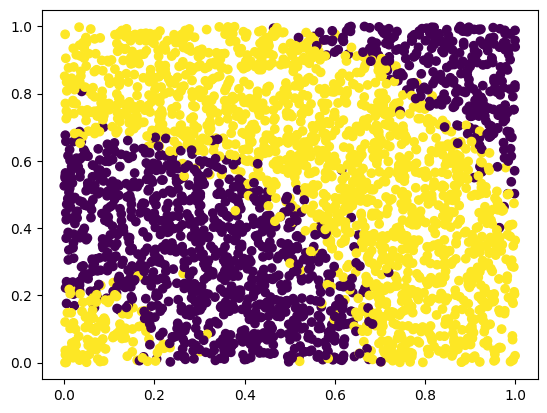

In [10]:
# This is our data
plt.scatter(X[:,0], X[:,1], c = y)

In [11]:
# We scale the coordinates to mean zero and standard deviation one, which makes it easier to train the neural networks.
X_scaled = X - X.mean(axis=0)
X_scaled = X_scaled/X_scaled.std(axis=0)

In [12]:
# This our logistic regression model with linear basis functions, using the compact `nn.Sequential` technique to define the network.
model = torch.nn.Sequential(torch.nn.Linear(2, 1), torch.nn.Sigmoid())

Here we are using the so called [Adam](https://arxiv.org/abs/1412.6980) optimizer. It's update step is slightly more sophisticated than the basic stochastic gradient descent optimizer used in the last exercise sheet. Instead of `torch.optim.SGD`, it can be accessed as `torch.otpim.Adam`.

In [13]:
# We now define loss function and optimizer
criterion = lambda p, y: -((1-y)*torch.log(1-p) + y*torch.log(p)).sum()   # same as torch.nn.BCELoss(), note that e.g. "f = lambda x: x^2" generates a function f(x) = x^2
optimizer = torch.optim.Adam(model.parameters(), lr =0.01)  # An alternative optimizer

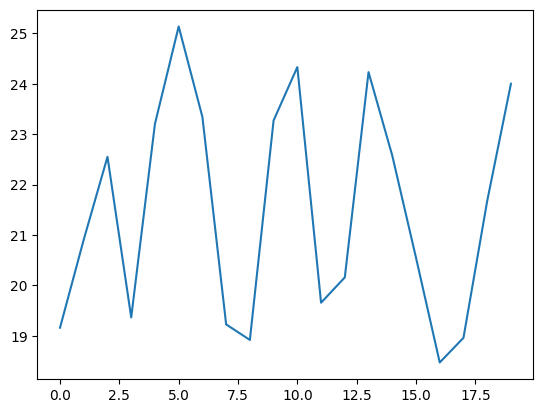

In [14]:
# This is a standard training loop
loss_hist = []
nbatch = 32  # number of training examples per minibatch
nepochs = 20 # numer of epoches, i.e. times we iterate through the entire dataset

for epoch in range(nepochs):
    # It is important to shuffle the dataset at each epoch so that the minibatches are not always the same
    shuffle = np.random.permutation(len(X))
    X_shuffled = X_scaled[shuffle]
    y_shuffled = y[shuffle]


    for i in range(len(X)//nbatch):
        X_scaled_batch = X_shuffled[i*nbatch:(i+1)*nbatch]
        y_batch = y_shuffled[i*nbatch:(i+1)*nbatch]

        optimizer.zero_grad()

        # forward pass
        y_pred = model(X_scaled_batch).squeeze(1)

        # compute loss
        loss = criterion(y_pred, y_batch)
        # backward pass
        loss.backward()
        optimizer.step()

    loss_hist.append(loss.item())
plt.plot(loss_hist)

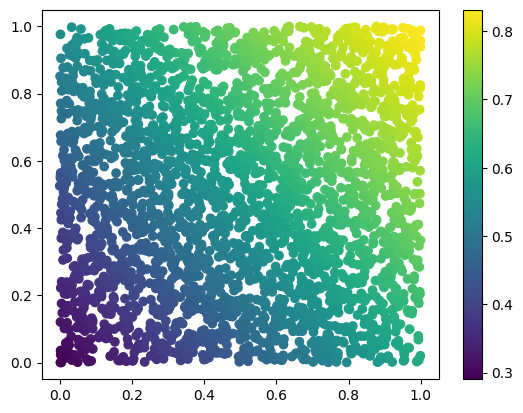

In [15]:
y_pred = model(X_scaled).squeeze(1).detach().numpy()
plt.scatter(X[:,0], X[:,1], c = y_pred)
plt.colorbar()

This is actually a pretty bad result, since it does not reflect our training data.  This is not a surprise, since the simple linear regression model with linear basis functions cannot generate a pattern like our training data. We will improve now in the next steps.

1.  (1 point) Explain briefly (one sentence each and in your own words) the role of the following components of the training loop: `nbatch`, `//`, `zero_grad()`, `.backward()`, `optimizer.step()`?



*   nbatch: The size of each batch
*   //: Division to the nearest whole number or integer


*   zero_grad() Reset each graident to zero for the adam optimizer
*   backward.() Compute the gradient of the loss function
* .optimizer.step() update the optimizer after computing the gradient





YOUR SOLUTION

2. (1 point) We saw above that the output of our model does not look like what we want. To judge this more quantitatively, write an accuracy function, similar to exercise sheet 2, and quantify the performance of the model using the 3000 points used for training. Use `np.around` to round the predictions of the network, compare with the truth, and calculate the fraction of matches.

*Hint*: The accuracy here is measured by the frequency in which the model gives higher probability to the true label.

In [16]:

def accuracy(model, data, target):
    # Set the model to evaluation mode
    model.eval()

    # Disable gradient computation
    with torch.no_grad():
        # Forward pass to get the predictions
        output = model(data).squeeze(1)

        # Get the index of the max log-probability (predicted class)
        pred = np.around(output.numpy())

        # Convert predictions and target to numpy arrays
        target = target.numpy().flatten()

        # Round the predictions using np.around

        # Calculate the fraction of matches
        matches = np.sum(np.equal(pred, target))
        total = len(target)
        acc = matches / total

    return acc
#data should be X_scaled
#target is y training
acc  = accuracy(model, X_scaled,y)
acc
print(f"The accuracy is  {acc*100}%")

The accuracy is  74.6%


3. (3 points) Improve the above model by introducing an additional hidden layer. Try out 2, 5, 25 and 50 as sizes for the single hidden layer. Use a ReLU activation function (`torch.nn.ReLU()`). How does it affect the result qualitatively? Evaluate this using the accuracy function from above.

Updated Accuracy: 74.6 For {2} Hidden layer size


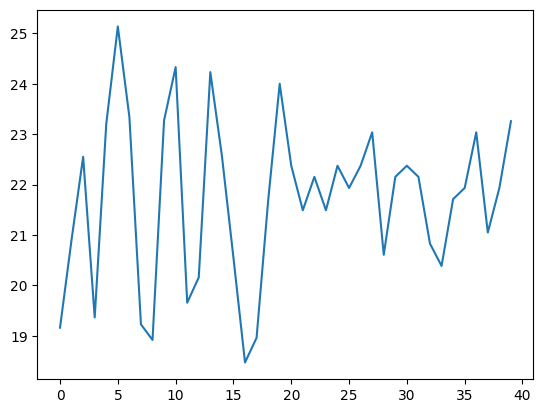

In [17]:
# YOUR SOLUTION
layer_size = 2

model = torch.nn.Sequential(torch.nn.Linear(2, 1),
                            torch.nn.Linear(1,layer_size),
                            torch.nn.ReLU(),
                            torch.nn.Linear(layer_size,1),
                            torch.nn.Sigmoid())

for epoch in range(nepochs):
    # It is important to shuffle the dataset at each epoch so that the minibatches are not always the same
    shuffle = np.random.permutation(len(X))
    X_shuffled = X_scaled[shuffle]
    y_shuffled = y[shuffle]


    for i in range(len(X)//nbatch):
        X_scaled_batch = X_shuffled[i*nbatch:(i+1)*nbatch]
        y_batch = y_shuffled[i*nbatch:(i+1)*nbatch]

        optimizer.zero_grad()

        # forward pass
        y_pred = model(X_scaled_batch).squeeze(1)

        # compute loss
        loss = criterion(y_pred, y_batch)
        # backward pass
        loss.backward()
        optimizer.step()

    loss_hist.append(loss.item())
plt.plot(loss_hist)
new_acc = accuracy(model, X_scaled, y)
print(f"Updated Accuracy: {acc*100}", "For",{layer_size},"Hidden layer size")

The accuracy doesn't improve with hidden layer size, that doesn't seem right, i would assume adding more layers would improve accuracy up to an upper limit

**Usage** of AI: *The accuracy function*

### 7.3 Regression! Testing the universal function approximation theorem (5 points)


In this exercise we will use a single layer perceptron to perform regression. We will, in this way, test the universal function approximation theorem by checking if such a simple neural network can approximate the cosine function well.

1. (1 point) Generate training data from a cosine function, `y = cos(x*4)`, with 1000 values of `x` uniformly drawn from [-1, 1]. Plot your function.

*Hint: Remember to convert your x and y data to torch tensors, if you create them using numpy.*

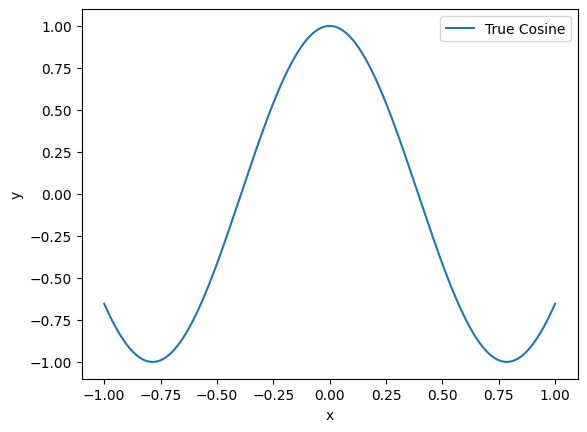

In [18]:
# YOUR CODE HRE
x_cos = torch.linspace(-1,1,1000)
y_cos = torch.cos(x_cos*4)
plt.plot(x_cos, y_cos, label='True Cosine')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [19]:
len(y_cos)

1000

2. (2 points) Define a network that implements a simple single-layer perceptron that maps general 1-dim inputs (x) onto general 1-dim outputs (y), with `nhidden` hidden parameters in the hidden layer. Use the ReLu activation function after the hidden layer. Instead of using `nn.Sequential` like above, complete the network class below. You have encountered this way of defining models before in section 6.3 on exercise sheet 4.

In [20]:
import torch.nn.functional as F
class SimplePerceptron(torch.nn.Module):
    def __init__(self, nhidden):
        # YOUR SOLUTION
        super(SimplePerceptron, self).__init__()
        self.hidden_layer = torch.nn.Linear(1, nhidden)
        self.output = torch.nn.Linear(nhidden,1)


    def forward(self, x):
        #use RElu to pass layer into model
        x = self.hidden_layer(x)
        #then pass through the output layer
        x = F.relu(x)
        x = self.output(x)

        return x

3. (2 points) Train that model to recover the cosine curve. You should do so by minimizing the mean square error between the predicted function and the ground truth cosine function defined above. What is the minimum number of hidden parameters that you need for results that you would consider satisfactory?

*Hint: Pytorch has a built-in MSE loss you may use, check the documentation.  It helps to randomize the ordering of the data to improve training. Consider a minibatch size of 16 or 32, about 100-200 epochs, and a small enough learning rate.*

Epoch 1/200, Loss: 0.6460
Epoch 101/200, Loss: 0.6460


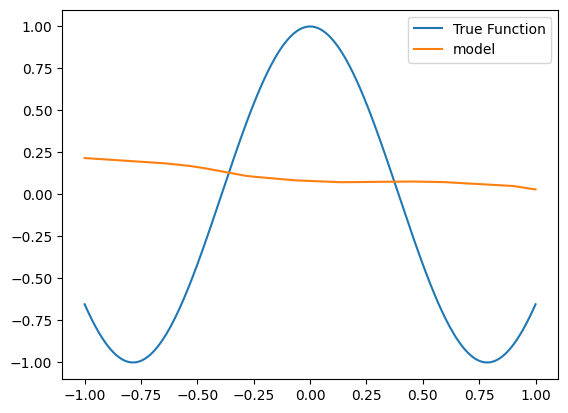

In [21]:
# YOUR SOLUTION
nepochs = 200
nbatch = 32
nhidden = 50
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr =0.001)  # An alternative optimizer

loss_hist = []

model = SimplePerceptron(nhidden)
model.train()


x_tensor = x_cos.unsqueeze(1)  # Convert x to a column tensor
y_tensor = y_cos.unsqueeze(1)  # Convert y to a column tensor
for epoch in range(nepochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_tensor)

    # Compute and print loss
    loss = criterion(y_pred, y_tensor)
    if epoch % 100 == 0:
        print(f'Epoch {epoch+1}/{nepochs}, Loss: {loss.item():.4f}')

    # Zero gradients, perform a backward pass, and update the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
x_test = torch.linspace(-1, 1, 1000).unsqueeze(1)  # Reshape to (1000, 1)
with torch.no_grad():
    y_pred = model(x_test)

plt.plot(x_cos,y_cos, label='True Function')
plt.plot(x_test.numpy(),y_pred.numpy(),label='model')
plt.legend()
plt.show()

**Usage** of AI: *I asked chatgpt for the epoch for loop*


## Chapter 8: Convolutional Neural Networks (13 points)

In this exercise, we will be building a convolutional network in PyTorch to recognize handwritten digits as given in the MNIST dataset.

Required reading (*pior* to starting the exercises!):

https://nextjournal.com/gkoehler/pytorch-mnist (Excellent blog post on which these exercises are based)

https://en.wikipedia.org/wiki/MNIST_database (Description of the dataset we will be working with)

### 8.1 Convolutions (1 point)

1. (1 point)
  Before implementing convolutions using pytorch below, let us make sure we understand what they are doing, by hand.

  Consider the convolutional kernel

  $$
  K = \begin{pmatrix}
    1 & 2 \\
    3 & 4
  \end{pmatrix} \,,
  $$

  and the  input data

  $$
  I = \begin{pmatrix}
    -1 & 1 & 0 \\
    1 & -1 & -1 \\
    1 & 1 & 1
  \end{pmatrix} \,.
  $$

  By hand, compute the convolution $I \circledast K$ without padding (also known as 'valid', so your output should be a 2x2 matrix).

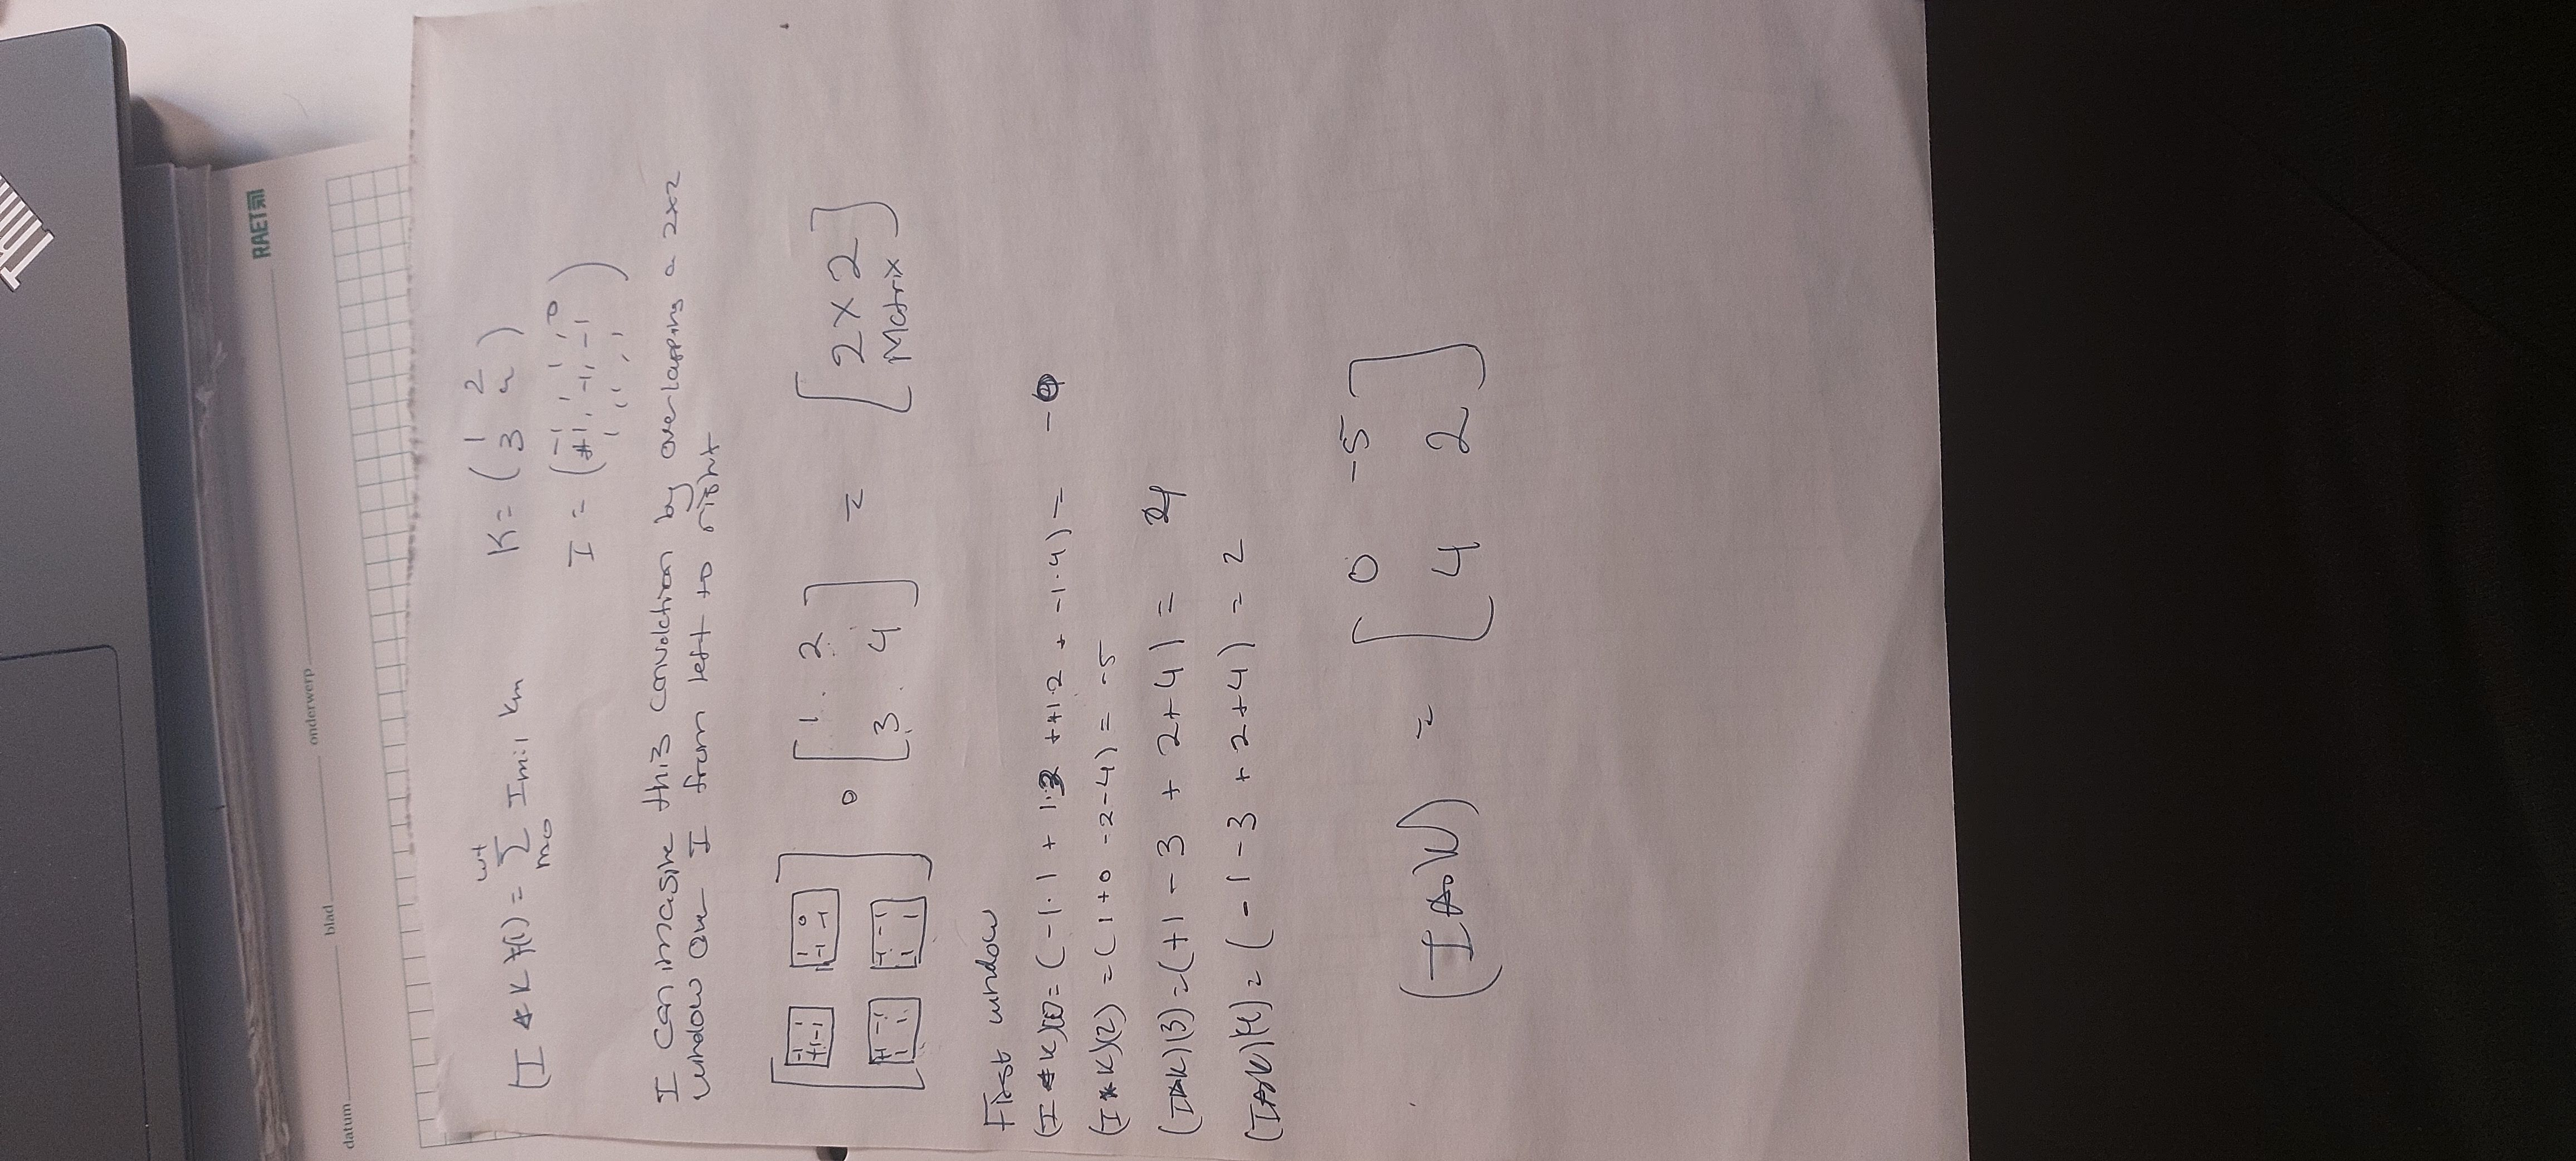

2. (2 point) Convolutional layers are the basic building block of deep convolutional neural networks that are used for image analysis tasks.
(a) Consider a 2-dim convolution layer with 2-channel input and 4-channel output. What is the number of parameters of that kernel if the kernel size is $5 \times 5$, including bias parameters?
(b) Describe in what sense convolutional layers are translation invariant. Are they rotation variant? (3-5 lines)



# A)
Each 2-channel input has to go through 25 kernel weights (5X5 matrix) and then each weight is applied to each dimension of the output channel (4). Plus The basis parameters for each channel in the output

So we have (2 X 5 X 5 X 4) + 4 = 204 parameter.

# B)
Image a picture of a number, $\textbf{8}$ is a good example. If i were to translate $\textbf{8}$ left, right up or down, i could still visualize it's the number $\textbf{8}$. Similarly if we apply a translation of x to a kernel matrix. We can use the one from above. Here i use $\vec{D} $ to represent the identity matrix for clarity sake.
$$
\vec{K} + x\vec{D}
$$

The convolution would just be
$I \circledast (K + x \vec{D})$ = $I \circledast K$ + ($I \circledast x\vec{D}$)
I can still return the original convolution.

For rotation if we rotate the number $\textbf{8}$ by 90 degrees it looks different almost like the infinity symbol, a neural network would discere it as something else like $∞$. And same idea for the kernel if we rotate the matrix $\vec{K}$ the order of operations changes, we are no longer invarant.

**Usage** of AI: *None*

### 8.2 Using the GPU

One advantage of using pytorch as a framework is that it allows us to execute our code on the GPU. This can often greatly reduce the runtime needed to train neural networks. Below is a short description of how to do this.

If you want to try this out on Colab, you need to switch to GPU by selecting "Runtime > Change runtime type > GPU".

**Note:** Using a GPU is not required here, but it will make the code run faster. You can also complete the exercises using only the CPU.

In [22]:
# check if a GPU is available for pytorch
torch.cuda.is_available()

True

In [23]:
# we now select the device based on what is available
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')

In [24]:
# let's look consider some dummy data
x = torch.tensor([0., 1., 2.])

In [25]:
# currently, the data is on the cpu
x.device

device(type='cpu')

In [26]:
# if we want to run code on the GPU, we have to move the input data to the corresponding device
x = x.to(DEVICE)

In [27]:
# we can check what device the tensor is on
x.device

device(type='cuda', index=0)

**Usage** of AI: *COMMENT HERE*

### 8.3 MNIST dataset (2 points)

Let's first initialize the random seeds.

In [28]:
# DO NOT CHANGE THIS
random_seed = 1
torch.manual_seed(random_seed)

Then we load training data.  We use here the traditional MNIST dataset, which are 28x28 images of hand-written digits between 0 and 9.

(Note: Don't worry if you see an HTTP Error 503 message, torchvision tries multiple URLs to download the data)

In [29]:
batch_size_train = 64  # by default we use a minibatch size of 64 for training.
# You can leave it like that during the subsequent exercises.

batch_size_test = 1000
#batch_size_test = 500

train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./files/', train=True, download=True,
          transform=torchvision.transforms.Compose([
              torchvision.transforms.ToTensor(),
              torchvision.transforms.Normalize(
                  (0.1307,), (0.3081,)),

          ])),
    batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./files/', train=False, download=True,
          transform=torchvision.transforms.Compose([
              torchvision.transforms.ToTensor(),
              torchvision.transforms.Normalize(
                  (0.1307,), (0.3081,)),
          ])),
    batch_size=batch_size_test, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15874117.73it/s]


Extracting ./files/MNIST/raw/train-images-idx3-ubyte.gz to ./files/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 491219.43it/s]


Extracting ./files/MNIST/raw/train-labels-idx1-ubyte.gz to ./files/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4442772.96it/s]


Extracting ./files/MNIST/raw/t10k-images-idx3-ubyte.gz to ./files/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 11817945.89it/s]

Extracting ./files/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./files/MNIST/raw



1. (1 point) Look up the `DataLoader` in PyTorch documentation. Explain the role of the `transform` statement in the above data loaders. What do the numbers 0.1307 and 0.3081 represent? Why do we normalize?  Why do we set `shuffle = True`?

YOUR SOLUTION

*  Transform by its name transforms the data given into a torch tensor, in our case we convert to a tensor and normalize. Here we convert MNIST images to tensors
*   0.1307 and 0.3081 are the mean and stanard deviation respectivley (CHATGPT)
* Normalizing is simpler for the network to handle, versus large numbers, it's also better for optimization.
*Shuffle - Reshuffles the batch to make sure the dataset since the exact same eachtime



The loaders act as Python `generator` objects. Now let's take a look at some examples. We'll use `test_loader` for this.

The `list` function transforms it into a simple Python list, which contains tuples of batches of example images and "targets" (the correct digit). Let's see what one test data batch consists of.

In [30]:
examples = list(test_loader)
example_data, example_targets = examples[0]
print(example_data.shape)
print(example_targets.shape)


torch.Size([1000, 1, 28, 28])
torch.Size([1000])


2. (1 point) Explain all components of the shapes of `example_data` and `example_targets`.

From the MNIST dataset, images are fit into a 28 by 28 pixel grid. We downloaded 1000 of these images. which is also the batch size, (I changed this to 500 to see what would happen to the dimensions of the data)

So for N batches we get an (N by 1 by 28 by 28) Tensor.



Let's visualize some of our test data.

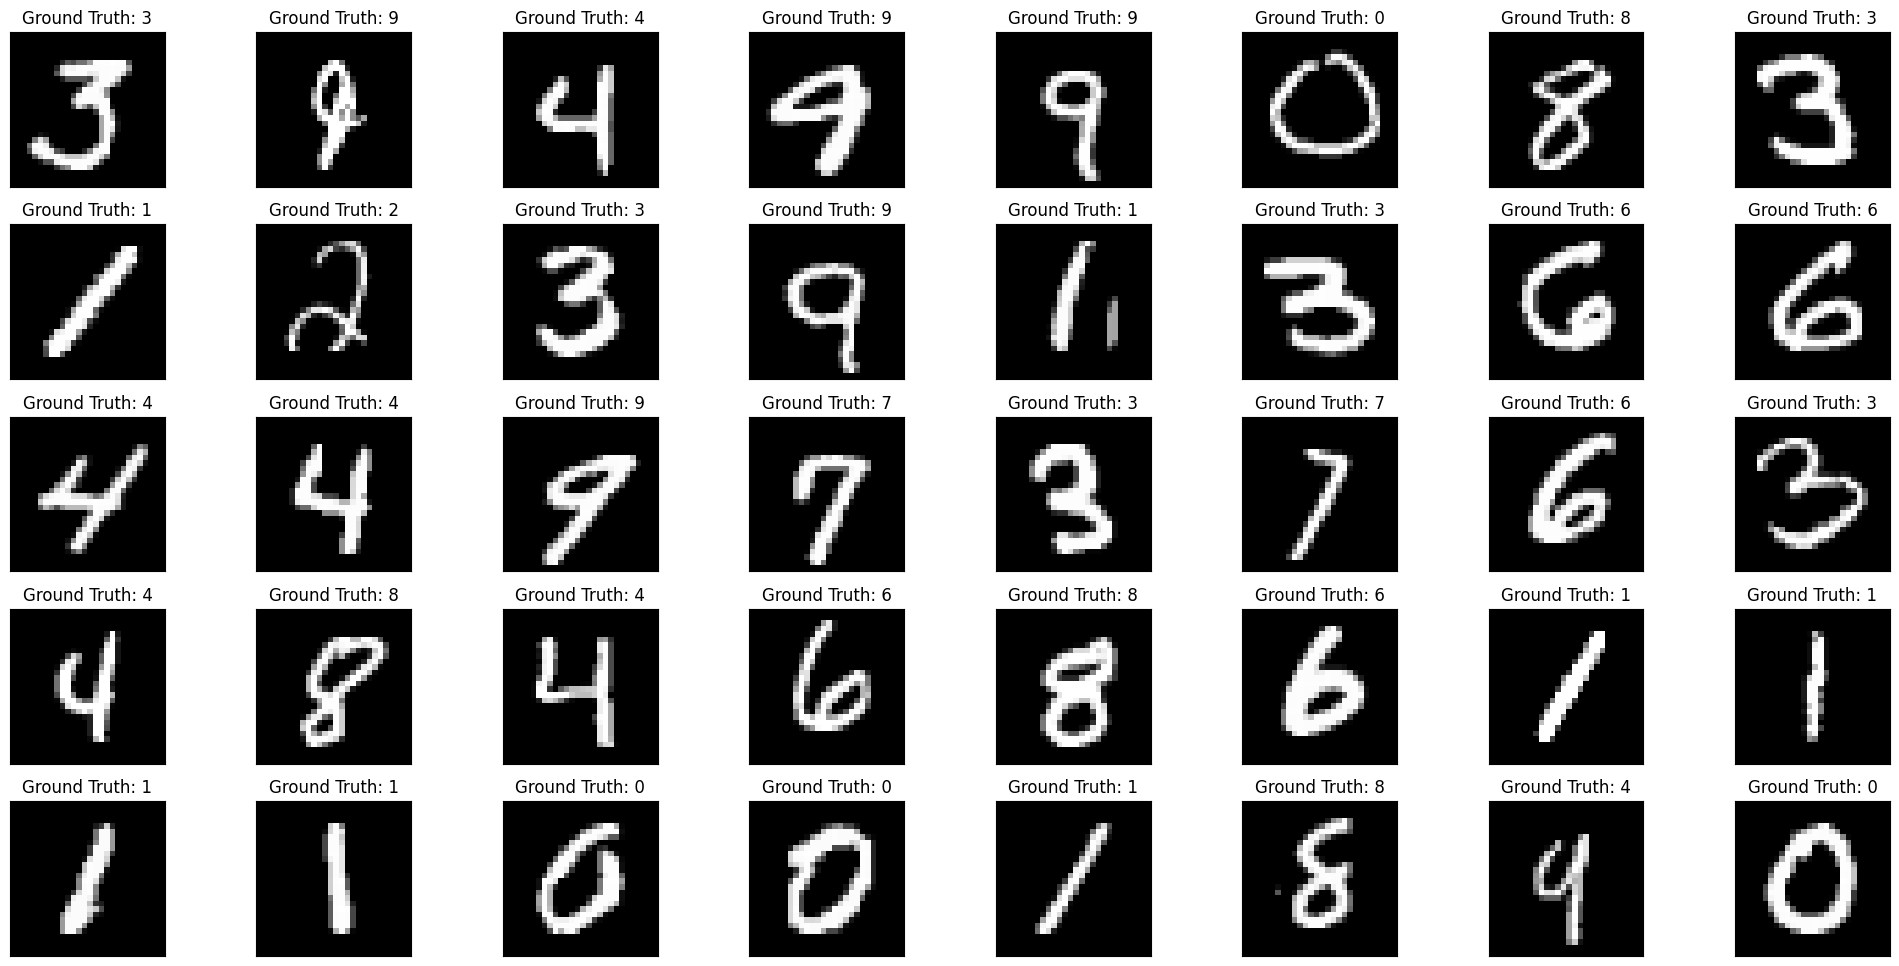

In [31]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
for i in range(40):
    plt.subplot(5,8,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])

We will subsequently use the training data for training, and the test data for estimating the accuracy of our training. The next step is to define a convolutional neural network.

**Usage** of AI: *FOR THE MNIST mean and standard deviation*

### 8.4 Building a CNN (5 points)

1. (4 points) Below you can see a diagram for a convolutional network, similar to the one you saw during the lecture. Translate this diagram into a PyTorch model by filling in the `Net` class below. After each max pooling step and after the first dense (linear) layer apply the relu activation function. You should use the modules `nn.Conv2d`, `nn.Linear` and the functions `F.max_pool2d` and `F.relu`.
Check the PyTorch documentation for these functions to see what parameters you must provide.

*Hint: Carefully think about the shapes of the intermediate layers and add padding to the convolutions where necessary, based on the information given below!*

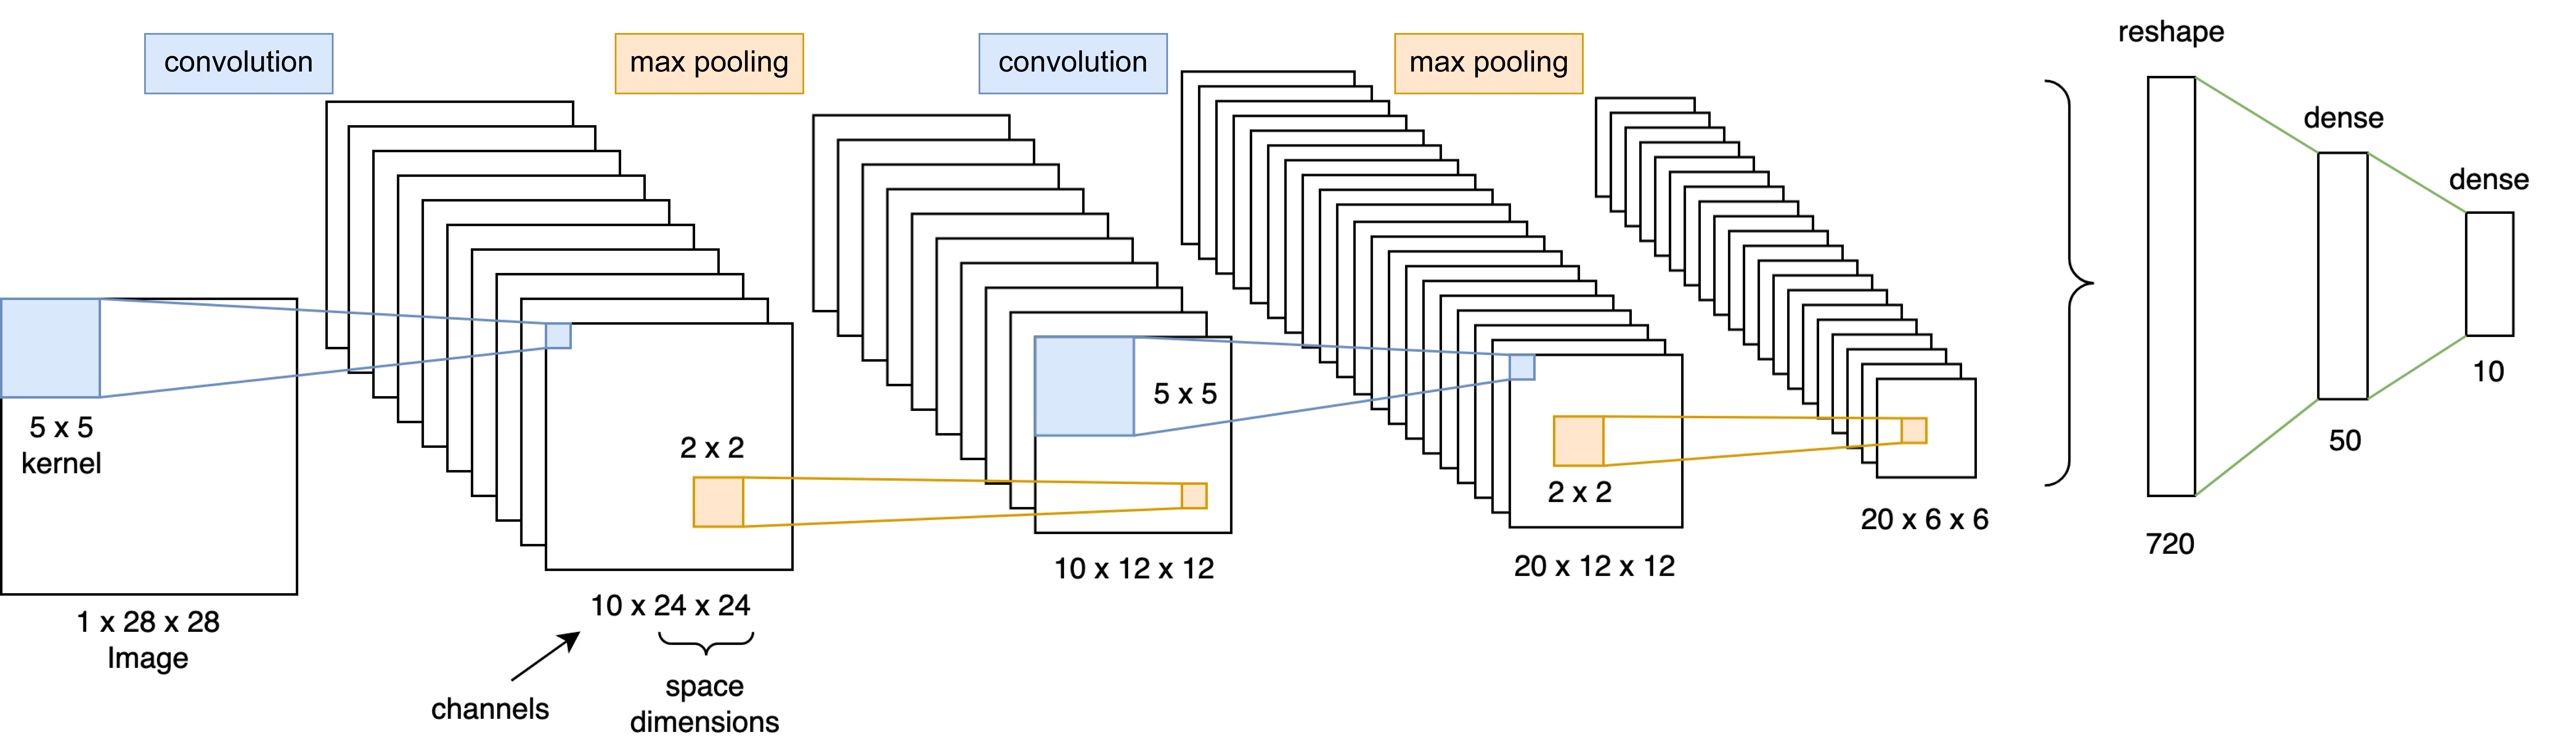

In [32]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [33]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # YOUR SOLUTION
        #first convolution 1 image into 10 channels, onto 5x5 kernel
        #padding onto 2x2 matrix
        self.convol_one = nn.Conv2d(1,10,kernel_size=5)

        #pooling
        #self.max_pool = F.max_pool2d(kernel_size=2)
        #same idea only on 10chanels to 20
        self.convol_two = nn.Conv2d(10,20,kernel_size=5,padding=2)
        #reshape matrix into 720 by 1
        self.reshape = nn.Linear(720,50)
        #final matrix is length 10 vector
        self.dense = nn.Linear(50,10)
    def forward(self, x):
        #first convolulve
        x = self.convol_one(x)
        #print(x.shape)
        #then relu
        x = F.relu(x)
        #first pool
        x = F.max_pool2d(x,kernel_size=2)
        #second colvol
        x  =self.convol_two(x)
        #second pool
        x = F.max_pool2d(x,kernel_size=2)
        #second relu
        x =F.relu(x)
        #reshape the matrix into a vector
        x = x.view(-1, 720)
        #reshape
        x = self.reshape(x)
        #dense
        x = self.dense(x)


        return x

Now we define the optimizer, and instantiate the network.

In [34]:
learning_rate = 0.001

network = Net().to(DEVICE)  # We move the network to the GPU
optimizer = optim.Adam(network.parameters(), lr=learning_rate)

n_epochs = 2  # 2 epochs by default.  Leave it like that throughout the subsequent exercises.

train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]


# This is the main training loop
log_interval = 10
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        data = data.to(DEVICE)
        target = target.to(DEVICE)
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append(
                (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))


# This is the main testing loop
def test():
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data = data.to(DEVICE)
            target = target.to(DEVICE)
            output = network(data)
            test_loss += F.cross_entropy(output, target, reduction='sum').item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

2. (1 point) Write down mathematically how the fraction of correct classifications on the test data is calculated in the above test function.

**Usage** of AI: *COMMENT HERE*

### 8.5 Evaluating the CNN's Performance (3 points)

Now let's do the training!

In [35]:
test()
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()


Test set: Avg. loss: 2.3073, Accuracy: 1000/10000 (10%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.322287
Train Epoch: 1 [640/60000 (1%)]	Loss: 1.792242
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.936633
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.474027
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.571949
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.510626
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.310142
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.342003
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.206876
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.217770
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.256683
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.141228
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.230332
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.120661
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.237155
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.183283
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.171911
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.120752
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.144050
Train Epoch: 1 [12160

Let's plot the training curve.

Text(0, 0.5, 'negative log likelihood loss')

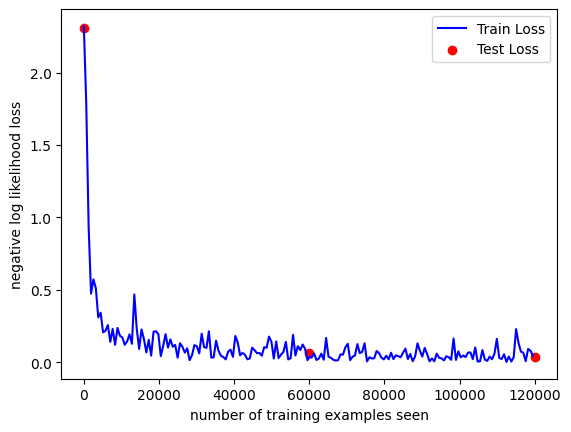

In [36]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')

Let's again look at a few examples as we did earlier in Section 9.1.2 and compare the model's output.

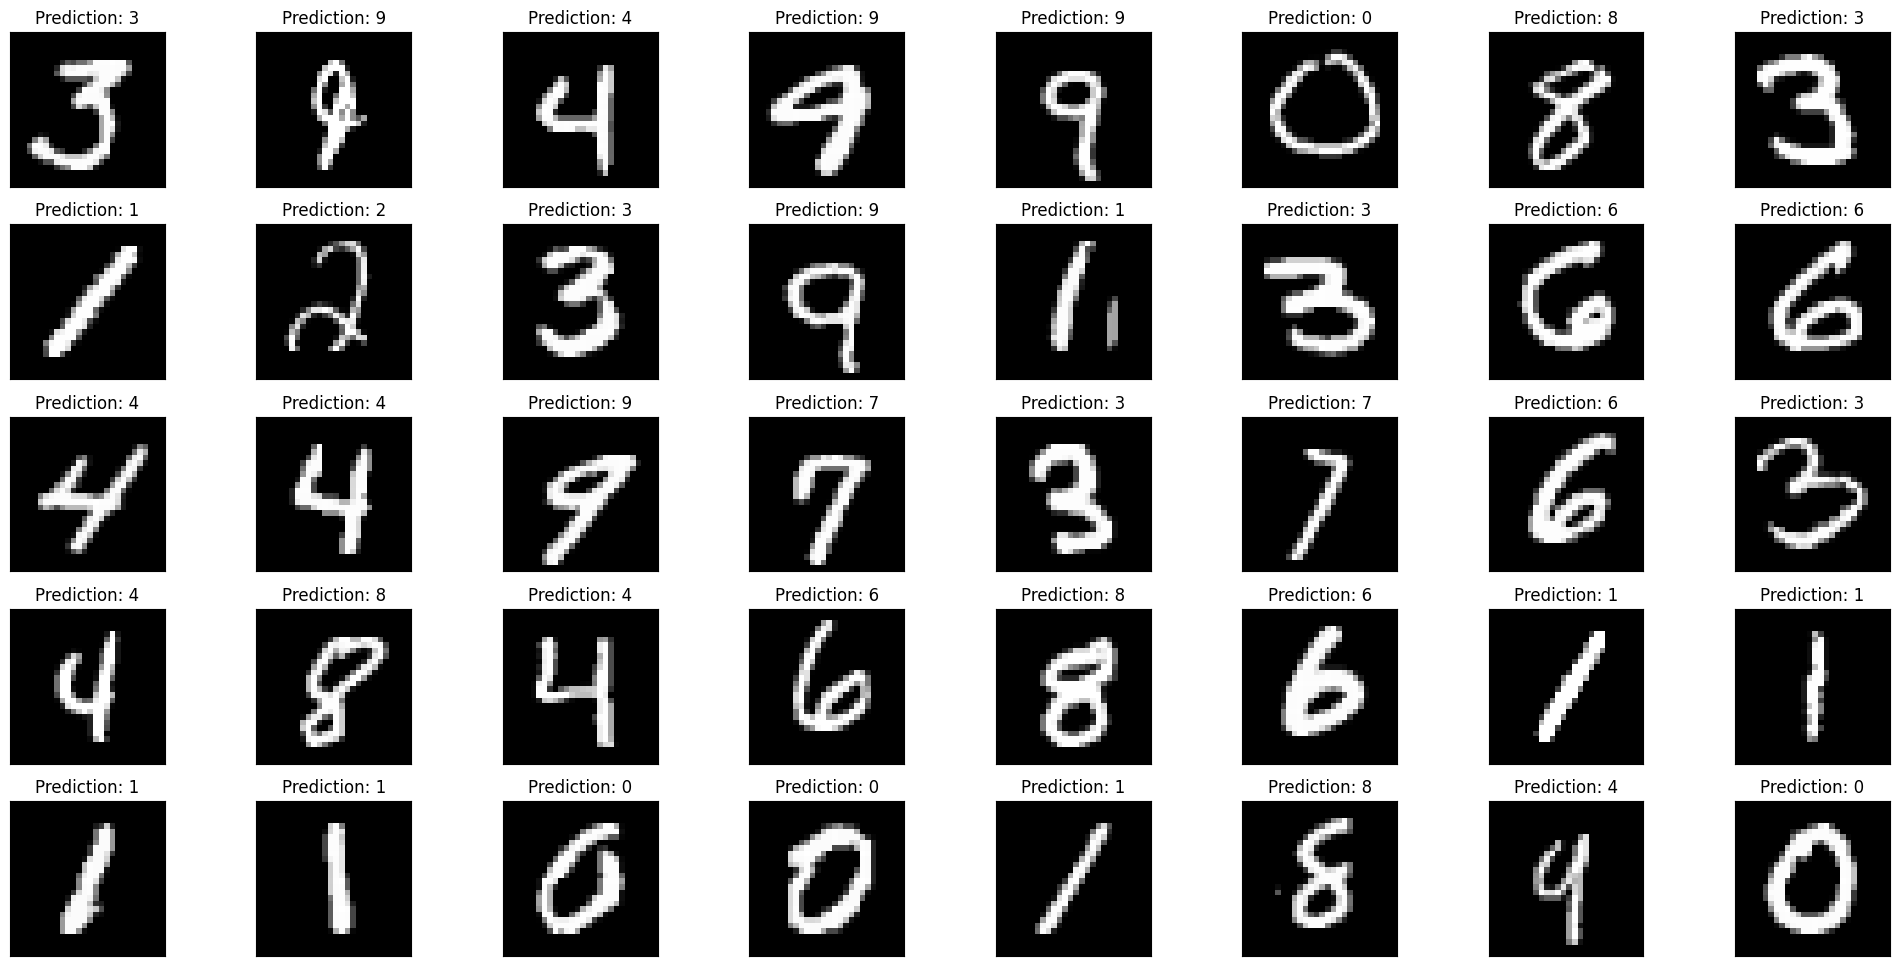

In [37]:
with torch.no_grad():
    output = network(example_data.to(DEVICE))

fig = plt.figure(figsize=(20, 10))
for i in range(40):
    plt.subplot(5,8,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Prediction: {}".format(
        output.data.max(1, keepdim=True)[1][i].item()))
    plt.xticks([])
    plt.yticks([])

1. (0.5 points) Run the above code and confirm that it has an accuracy of 98% or so. Explain why the initial accuracy is around 10%.

Test set: Avg. loss: 0.0543, Accuracy: 9821/10000 (98%)

The final accuracy is 98%, we start at 10% because our guesses are random.


2. (2.5 points) Let's compare this to a one-layer perceptron (i.e. no hidden layers). Write a new `class Net` that flattens the 28 x 28 images, passes them through one fully connected linear layer with input size 28 times 28 and outputs a 10 dimensional one-hot vector. What is the classification accuracy in this case? Are you surprised? Discuss how the accuracy compares to the accuracy from the CNN from before.

In [38]:


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(28 * 28, 10)  # Input size: 28*28, Output size: 10

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input images
        x = self.fc(x)
        return x


training loop copied from above

In [39]:
learning_rate = 0.001

network = Net().to(DEVICE)  # We move the network to the GPU
optimizer = optim.Adam(network.parameters(), lr=learning_rate)

n_epochs = 2  # 2 epochs by default.  Leave it like that throughout the subsequent exercises.

train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]


# This is the main training loop
log_interval = 10
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        data = data.to(DEVICE)
        target = target.to(DEVICE)
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append(
                (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))


# This is the main testing loop
def test():
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data = data.to(DEVICE)
            target = target.to(DEVICE)
            output = network(data)
            test_loss += F.cross_entropy(output, target, reduction='sum').item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [40]:
test()
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()


Test set: Avg. loss: 2.5328, Accuracy: 740/10000 (7%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.639353
Train Epoch: 1 [640/60000 (1%)]	Loss: 1.586233
Train Epoch: 1 [1280/60000 (2%)]	Loss: 1.114034
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.819692
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.668201
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.538679
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.573241
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.606548
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.521687
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.467157
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.493698
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.484343
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.490650
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.656237
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.392491
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.378403
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.567505
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.318811
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.252568
Train Epoch: 1 [12160/6

Text(0, 0.5, 'negative log likelihood loss')

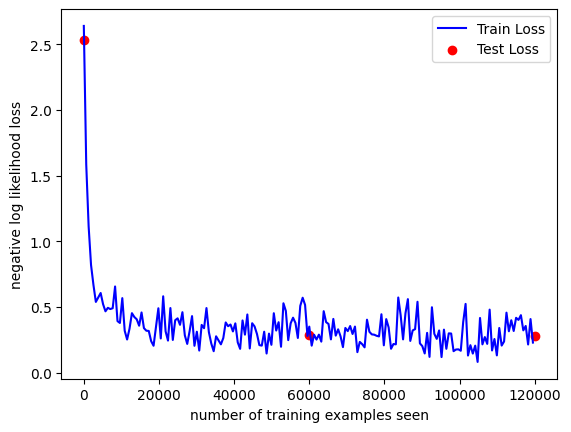

In [41]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')

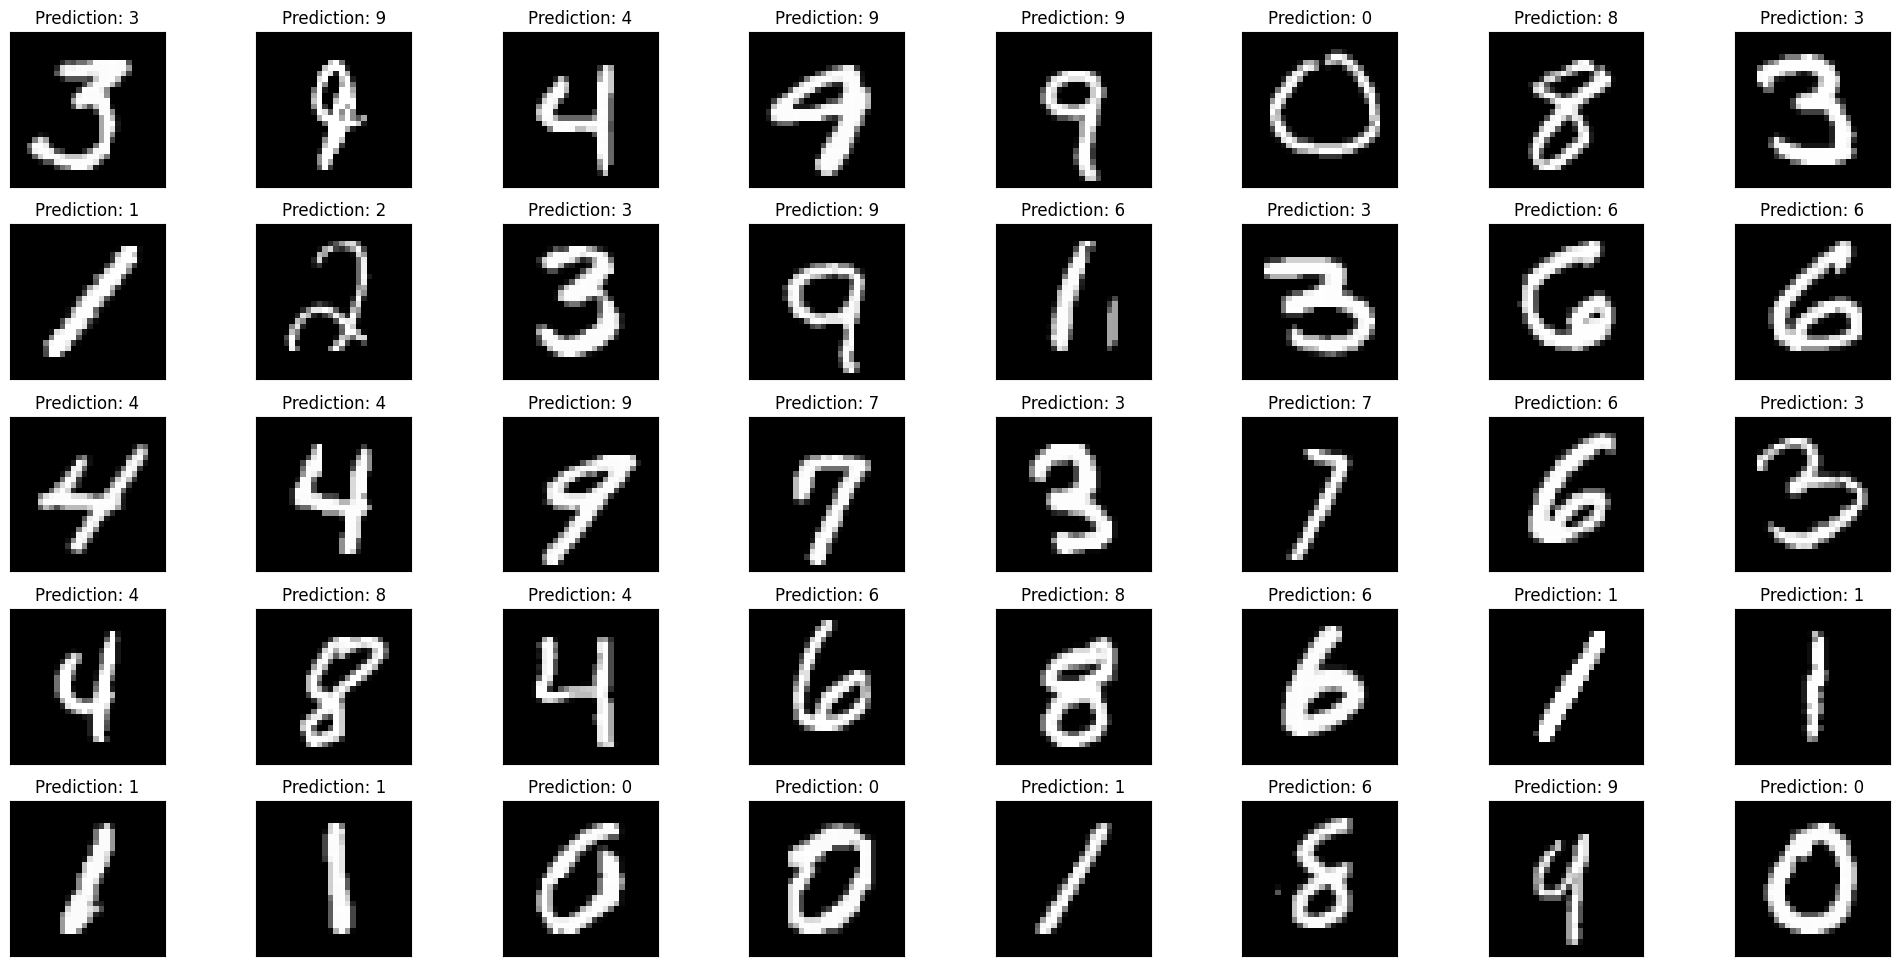

In [42]:
with torch.no_grad():
    output = network(example_data.to(DEVICE))

fig = plt.figure(figsize=(20, 10))
for i in range(40):
    plt.subplot(5,8,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Prediction: {}".format(
        output.data.max(1, keepdim=True)[1][i].item()))
    plt.xticks([])
    plt.yticks([])

The final accuracy is 92% but the predicitions are much better to ground truth compared to the previous one. I think because we lose information about our guess when we pool and condense the images in the first model.

**Usage** of AI: *None*